In [63]:
%reset

In [64]:
#import packages
import numpy as np
import pandas as pd
from datetime import datetime
#import xclim as xc
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

In [65]:
import os
#set path for root directory
ROOT_DIR = os.path.abspath(os.curdir)

In [66]:
import sys
#this is to reload the work in progress modules that are not in the current directory
import importlib
import hydroplotting
%reload_ext autoreload
%autoreload 1

In [67]:
from hydroplotting import funcutils as fc

#get paths for data files
path_Skook_obs = ROOT_DIR + '/Data/Raw/bcqc_47.68000_-121.61000._Skookum_Creek.txt'
path_Skook_model = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_baseline.csv'
path_Skook_model_53 = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_53.csv'
path_Skook_model_61 = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_61.csv'
path_Skook_model_89 = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_89.csv'
path_Skook_model_91 = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_91.csv'
path_Skook_model_99 = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_99.csv'
path_Skook_model_101 = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_101.csv'
path_Skook_model_75 = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_75.csv'
path_Skook_model_77 = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_77.csv'
path_Skook_model_prism_grid = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_grid.csv'
path_Skook_model_67 = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_67.csv'
path_Skook_model_prism_delta = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta.csv'

path_flow_obs = ROOT_DIR + '/Data/Raw/12147600_ref_short.csv'
#path_flow_model = ROOT_DIR + '/Data/Raw/12147600_prism_delta.day'
path_flow_model = ROOT_DIR + '/Data/Raw/12147600_67.day'

df_model_data_Skookum = fc.get_model_dataframe(path_Skook_model)
ds_model_point_Skookum = fc.model_point_data_xr(df_model_data_Skookum)

df_model_data_Skookum_53 = fc.get_model_dataframe(path_Skook_model_53)
df_model_data_Skookum_61 = fc.get_model_dataframe(path_Skook_model_61)
df_model_data_Skookum_89 = fc.get_model_dataframe(path_Skook_model_89)
df_model_data_Skookum_91 = fc.get_model_dataframe(path_Skook_model_91)
df_model_data_Skookum_99 = fc.get_model_dataframe(path_Skook_model_99)
df_model_data_Skookum_101 = fc.get_model_dataframe(path_Skook_model_101)
df_model_data_Skookum_75 = fc.get_model_dataframe(path_Skook_model_75)
df_model_data_Skookum_77 = fc.get_model_dataframe(path_Skook_model_77)
df_model_data_Skookum_prism_grid = fc.get_model_dataframe(path_Skook_model_prism_grid)
df_model_data_Skookum_prism_delta = fc.get_model_dataframe(path_Skook_model_prism_delta)
df_model_data_Skookum_67 = fc.get_model_dataframe(path_Skook_model_67)
#observations
df_snotel_Skookum = fc.snotel_data(path_Skook_obs)
ds_bcbq_obs_Skookum = fc.bcbq_snotel_data_xr(df_snotel_Skookum)



In [68]:
flow_obs = pd.read_csv(path_flow_obs,  header = None)
flow_obs.columns = ['year', 'month', 'day', 'Q_cms']
flow_obs['datetime'] = pd.to_datetime(flow_obs[['year', 'month', 'day']])
flow_obs = flow_obs.set_index('datetime')
flow_obs['datetime'] = pd.to_datetime(flow_obs[['year', 'month', 'day']])
fc.calc_water_year_apply(flow_obs)
flow_obs['water_year_str'] = flow_obs['water_year'].astype(str)
#flow_obs.Q_cms.plot()

In [69]:
flow_model = pd.read_csv(path_flow_model, sep='\s+', header = None)
flow_model.columns = ['year', 'month', 'day', 'Q_cms']
flow_model['datetime'] = pd.to_datetime(flow_model[['year', 'month', 'day']])
flow_model = flow_model.set_index('datetime')
flow_model['datetime'] = pd.to_datetime(flow_model[['year', 'month', 'day']])
#apply water year
fc.calc_water_year_apply(flow_model)
flow_model['water_year_str'] = flow_model['water_year'].astype(str)

Text(0, 0.5, 'SWE [in]')

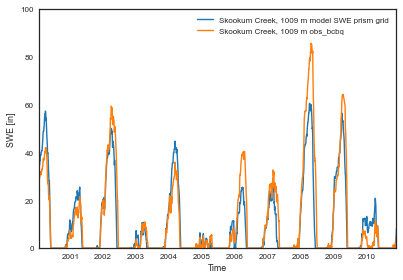

In [70]:
#plot modeled SWE vs. observed at Skookum Creek
ax = df_model_data_Skookum_prism_delta.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model SWE prism grid')
df_snotel_Skookum.plot(kind='line',  y = 'SWE_in', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
#df_model_data_Skookum_67.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 67 SWE', ax = ax)
#df_model_data_Skookum_99.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 99 SWE', ax = ax)


ax.set_xlim([datetime(2000, 1, 21), datetime(2010, 12, 1)])
ax.set_ylim([0, 100])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

Text(0, 0.5, 'SWE [in]')

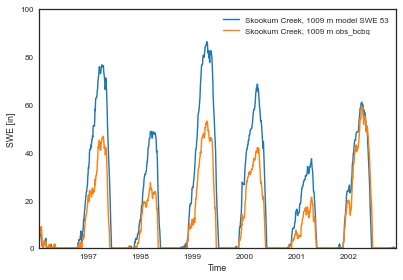

In [71]:
#plot modeled SWE vs. observed at Skookum Creek
ax = df_model_data_Skookum.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model SWE 53')
df_snotel_Skookum.plot(kind='line',  y = 'SWE_in', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
#df_model_data_Skookum_99.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 99 SWE', ax = ax)
#df_model_data_Skookum_99.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 99 SWE', ax = ax)


ax.set_xlim([datetime(1996, 1, 21), datetime(2002, 12, 1)])
ax.set_ylim([0, 100])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

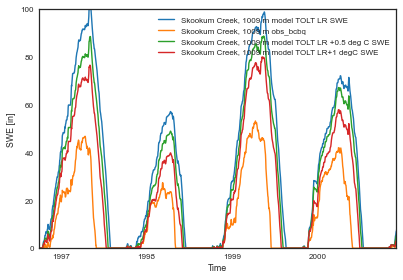

In [72]:
#plot SWE from different model runs - sensitivity to warming
ax = df_model_data_Skookum_99.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model TOLT LR SWE')
df_snotel_Skookum.plot(kind='line',  y = 'SWE_in', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
#df_model_data_Skookum_53.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 53 SWE', ax = ax)
df_model_data_Skookum_101.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model TOLT LR +0.5 deg C SWE', ax = ax)
df_model_data_Skookum_91.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model TOLT LR+1 degC SWE', ax = ax)

ax.set_xlim([datetime(1996, 10, 1), datetime(2000, 12, 1)])
ax.set_ylim([0, 100])
plt.xlabel('Time')
plt.ylabel('SWE [in]')
plt.show()

Text(0, 0.5, 'SWE [in]')

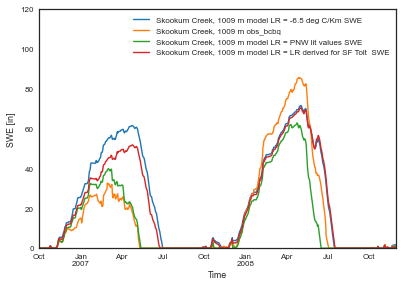

In [73]:
#plot SWE from different model runs - sensitivity to warming
ax = df_model_data_Skookum_61.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model LR = -6.5 deg C/Km SWE')
df_snotel_Skookum.plot(kind='line',  y = 'SWE_in', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
df_model_data_Skookum_53.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model LR = PNW lit values SWE', ax = ax)
df_model_data_Skookum_99.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model LR = LR derived for SF Tolt  SWE', ax = ax)
#df_model_data_Skookum_91.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 91 SWE', ax = ax)

ax.set_xlim([datetime(2006, 10, 1), datetime(2008, 12, 1)])
ax.set_ylim([0, 120])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

Text(0, 0.5, 'SWE [in]')

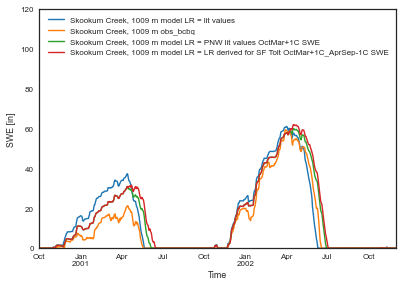

In [74]:
#plot SWE from different model runs - sensitivity to warming
ax = df_model_data_Skookum_53.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model LR = lit values')
df_snotel_Skookum.plot(kind='line',  y = 'SWE_in', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
df_model_data_Skookum_75.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model LR = PNW lit values OctMar+1C SWE', ax = ax)
df_model_data_Skookum_77.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model LR = LR derived for SF Tolt OctMar+1C_AprSep-1C SWE', ax = ax)
#df_model_data_Skookum_91.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 91 SWE', ax = ax)

ax.set_xlim([datetime(2000, 10, 1), datetime(2002, 12, 1)])
ax.set_ylim([0, 120])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

Text(0, 0.5, 'SWE [in]')

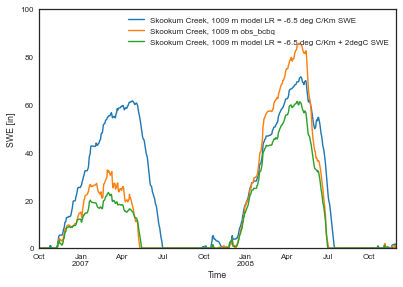

In [75]:
#plot SWE from different model runs - sensitivity to warming
ax = df_model_data_Skookum_61.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model LR = -6.5 deg C/Km SWE')
df_snotel_Skookum.plot(kind='line',  y = 'SWE_in', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
#df_model_data_Skookum_99.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 99 SWE', ax = ax)
df_model_data_Skookum_89.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model LR = -6.5 deg C/Km + 2degC SWE', ax = ax)
#df_model_data_Skookum_91.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 91 SWE', ax = ax)

ax.set_xlim([datetime(2006, 10, 1), datetime(2008, 12, 1)])
ax.set_ylim([0, 100])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

In [46]:
#bias correction of T

In [61]:
def plotSWE_P_T_Q(t, sP, sSWE, sT, sQ, time_period):
    fig = plt.figure()
    #gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 2, 1])

    # SWE plot
    ax = plt.subplot(gs[1])

    ax.plot(t, sSWE, color="r")
    # Create secondary axes
    ax2 = ax.twinx()
    ax2.bar(t, -sP, color=['black'])

    # fix the axis labels
    #convert P to mm/day

    max_pre = max(sP)

    #y2_ticks = np.linspace(0, max_pre, max_pre + 1)

    #y2_ticks = np.rint(y2_ticks)

    #y2_ticklabels = [str(i) for i in y2_ticks]

    #ax2.set_yticks(-1 * y2_ticks)
    #ax2.set_yticklabels(y2_ticklabels)

    ax.set_xlim(time_period)

    ax.set_ylabel('SWE[m]', color='k')

    ax2.set_ylabel('P[mm/day]', color='k')

    ax.tick_params(axis='y', colors='k')
    ax.xaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    ax.yaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    ax.set_xlim(min(t), max(t))

    ax.set_ylim(0, 0.8)

    #ax.set_ylim(0, np.nanmax(sSWE)*1.2)
    ax.set_xlim(time_period)
    plt.setp(ax.get_xticklabels(), visible=False)
    # temperature plot

    ax2 = plt.subplot(gs[0])

    ax2.plot(t, sT)
    ax2.xaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    ax2.yaxis.grid(visible=None, which='major', color='0.7', linestyle='-')
    ax2.set_ylabel('T [deg C]')
    ax2.set_xlim(min(t), max(t))
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.set_xlim(time_period)

    ax2 = plt.subplot(gs[2])

    sQ_p = sQ.loc[t]

    ax2.plot(t, sQ_p)
    ax2.xaxis.grid(visible=None, which='major', color='.9', linestyle='-')
    ax2.yaxis.grid(visible=None, which='major', color='0.9', linestyle='-')
    ax2.set_ylabel('Q [cms])')
    ax2.set_xlim(min(t), max(t))
    ax2.set_xlabel('Time')
    ax2.tick_params(axis='x', labelrotation=45)

    plt.tight_layout()
    #ax2.invert_yaxis()
    plt.gcf().subplots_adjust(bottom=0.15)
    ax2.set_xlim(time_period)
    #ax3.set_xlim(time_period)
    #ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)
    plt.show()
    #plt.style.use('seaborn-paper')
    #plt.savefig(filename,format='pdf')
    plt.close(fig)


In [76]:
time_period = [datetime(2015, 10, 1), datetime(2016, 7, 1)]

plotSWE_P_T_Q(df_snotel_Skookum.index,
              df_snotel_Skookum.daily_P_in.fillna(0)*25.4,
              df_snotel_Skookum.SWE_m, df_snotel_Skookum.Tmean_C, flow_obs.Q_cms, time_period)
ax.set_ylim(0, 2)

NameError: name 'plotSWE_P_T_Q' is not defined

In [29]:
flow_obs

,year,month,day,Q_cms,datetime,water_year,water_year_str
datetime,,,,,,,
1967-11-01,1967,11,1,114.0,1967-11-01,1968,1968
1967-11-02,1967,11,2,54.0,1967-11-02,1968,1968
1967-11-03,1967,11,3,37.0,1967-11-03,1968,1968
1967-11-04,1967,11,4,29.0,1967-11-04,1968,1968
1967-11-05,1967,11,5,24.0,1967-11-05,1968,1968
...,...,...,...,...,...,...,...
2022-06-01,2022,6,1,104.0,2022-06-01,2022,2022
2022-06-02,2022,6,2,119.0,2022-06-02,2022,2022
2022-06-03,2022,6,3,161.0,2022-06-03,2022,2022
